# Final Project Options:
√ 1- Apply supervised or un-supervised models to a dataset (or problem) you are interested in. Investigate variety of steps
to make the model better including:
  - Hyper-parameter tuning by Grid-search
  - Check if dataset is balanced or not -> change the threshold
  - Data preprocessing (scaling)
  - Dimensionality reduction (PCA) -> train the model based on X_reduced_train and Y_reduced_train
  - Eliminate unnecessary features -> Feature Engineering
  - Try other models and do the above all steps

√ 2- Read blogs about Feature Engineering and make your model performance better with variety of Feature Engineering options:
- https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

3- Build a Decision Tree (DT) classifier from Scratch (you can use Pandas or any other Python built-in functions) and provide DT visualization. For any categorical dataset, your function should return the optimal tree with the root and all appropriate leafs, max_depth of the tree and the visualized graph. You can follow the steps we explored in class but should work for any dataset for example if we pass Lens dataset. 

Option 1 is solo but you can work as a group for options 2 or 3.

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

from sklearn import preprocessing, metrics, preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('2018_MatchData.csv').set_index("Week")
Categorical = ['Event','City','State','Country','Match','Alliance','autoQuestRankingPoint','autoRun',
               'autoSwitchAtZero','endgame','faceTheBossRankingPoint','tba_gameData','result']

#         .drop(columns=['Event','City','State','Country','Time',
#                        'Match','Alliance','result','autoQuestRankingPoint',
#                        'autoRun','autoSwitchAtZero','endgame','faceTheBossRankingPoint',
#                        'Robot Number', 'adjustPoints', 'tba_gameData'
#                       ]).set_index('Team')


# data = data[data['Team'] == 2927].set_index(['Event', 'Match', 'Alliance'])

label_encoder = LabelEncoder()
for i in data.columns:
    data[i] = label_encoder.fit_transform(data[i]).astype('float64')

y = data['result']
x = data.drop(columns=['result'])
x

,Event,City,State,Country,Time,Match,Team,Alliance,Robot Number,adjustPoints,...,teleopSwitchOwnershipSec,totalPoints,vaultBoostPlayed,vaultBoostTotal,vaultForcePlayed,vaultForceTotal,vaultLevitatePlayed,vaultLevitateTotal,vaultPoints,winMargin
Week,,,,,,,,,,,,,,,,,,,,,
6,0.0,14.0,0.0,1.0,13820.0,0.0,730.0,0.0,0.0,18.0,...,84.0,263.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,379.0
6,0.0,14.0,0.0,1.0,13820.0,0.0,1188.0,0.0,1.0,18.0,...,84.0,263.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,379.0
6,0.0,14.0,0.0,1.0,13820.0,0.0,2394.0,0.0,2.0,18.0,...,84.0,263.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,379.0
6,0.0,14.0,0.0,1.0,13820.0,0.0,171.0,1.0,0.0,18.0,...,103.0,371.0,3.0,3.0,1.0,1.0,1.0,3.0,7.0,595.0
6,0.0,14.0,0.0,1.0,13820.0,0.0,728.0,1.0,1.0,18.0,...,103.0,371.0,3.0,3.0,1.0,1.0,1.0,3.0,7.0,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,177.0,75.0,49.0,6.0,9018.0,159.0,765.0,0.0,1.0,18.0,...,137.0,328.0,3.0,3.0,2.0,2.0,1.0,3.0,8.0,454.0
4,177.0,75.0,49.0,6.0,9018.0,159.0,1266.0,0.0,2.0,18.0,...,137.0,328.0,3.0,3.0,2.0,2.0,1.0,3.0,8.0,454.0
4,177.0,75.0,49.0,6.0,9018.0,159.0,761.0,1.0,0.0,18.0,...,137.0,361.0,3.0,3.0,0.0,2.0,1.0,3.0,8.0,520.0


# 1. Filter Method:
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

The correlation coefficient has values between -1 to 1

    — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    — A value closer to 1 implies stronger positive correlation
    — A value closer to -1 implies stronger negative correlation

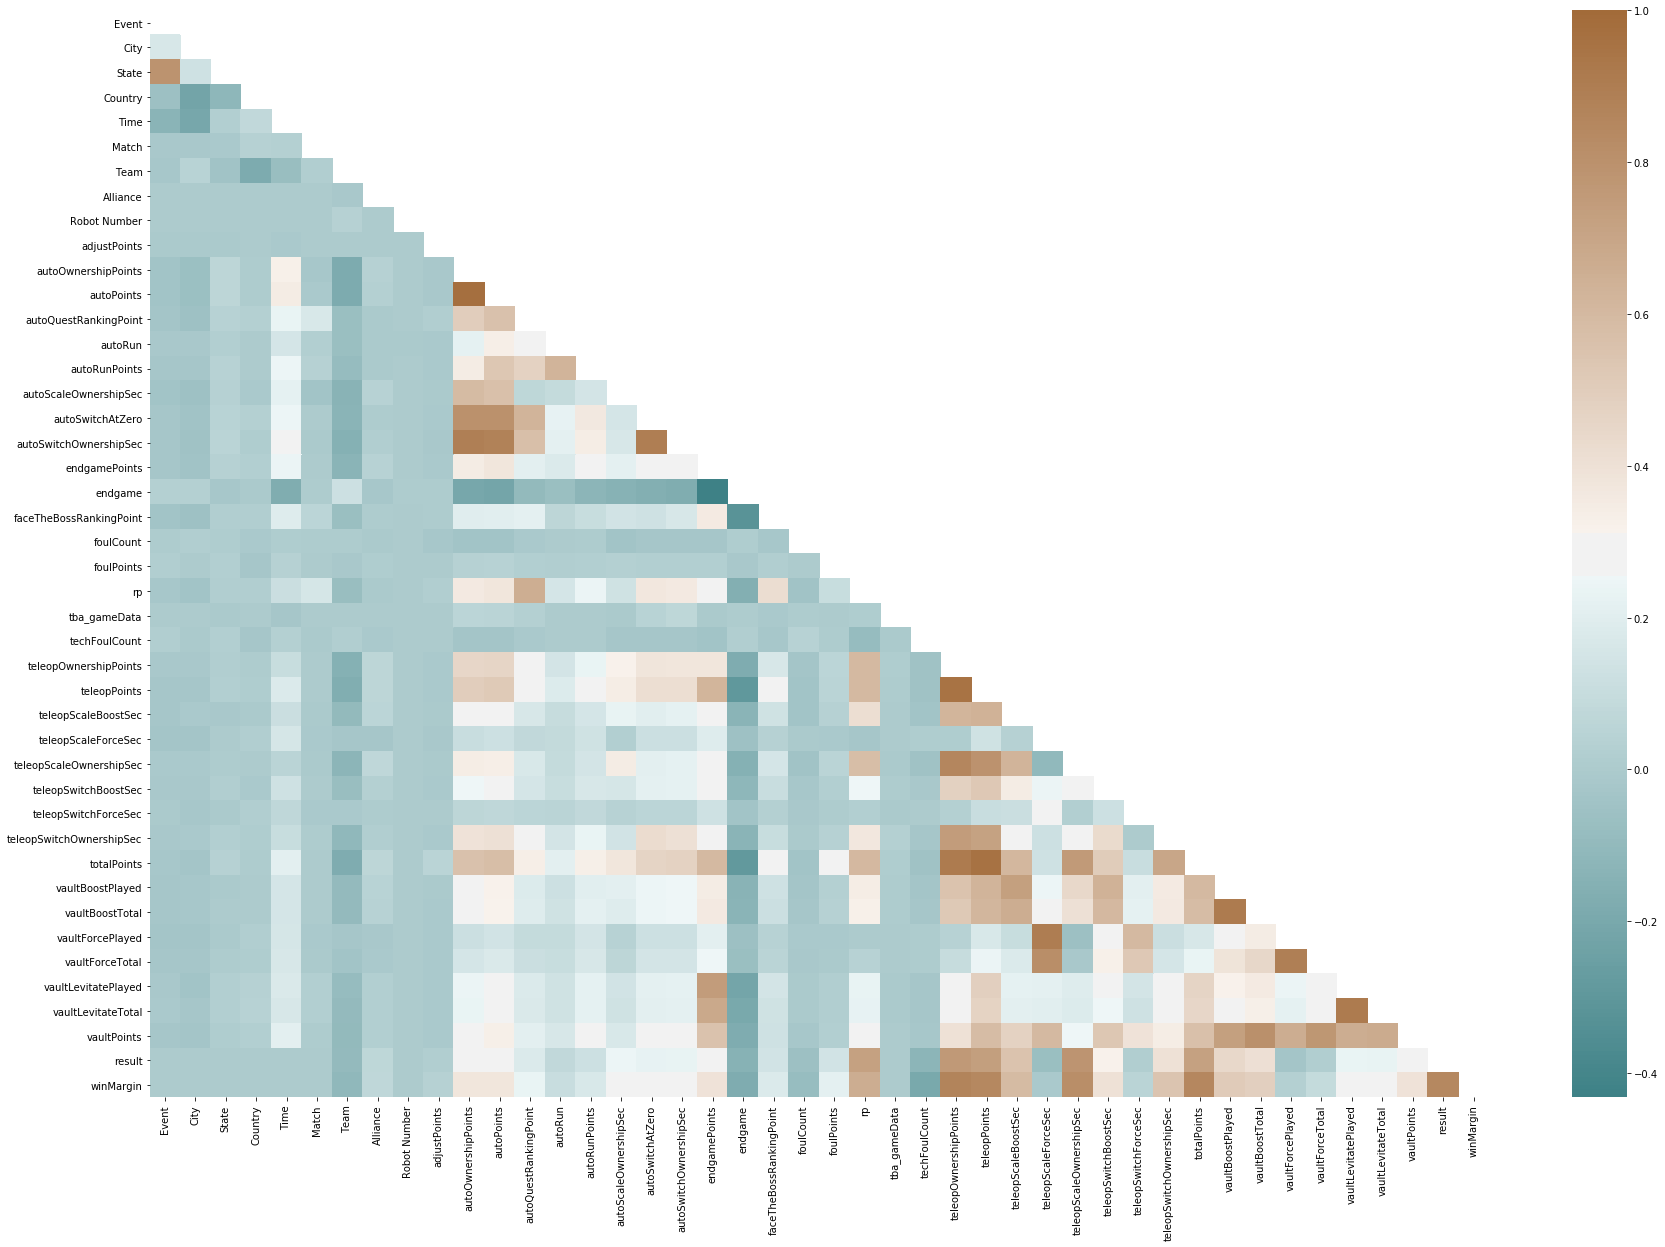

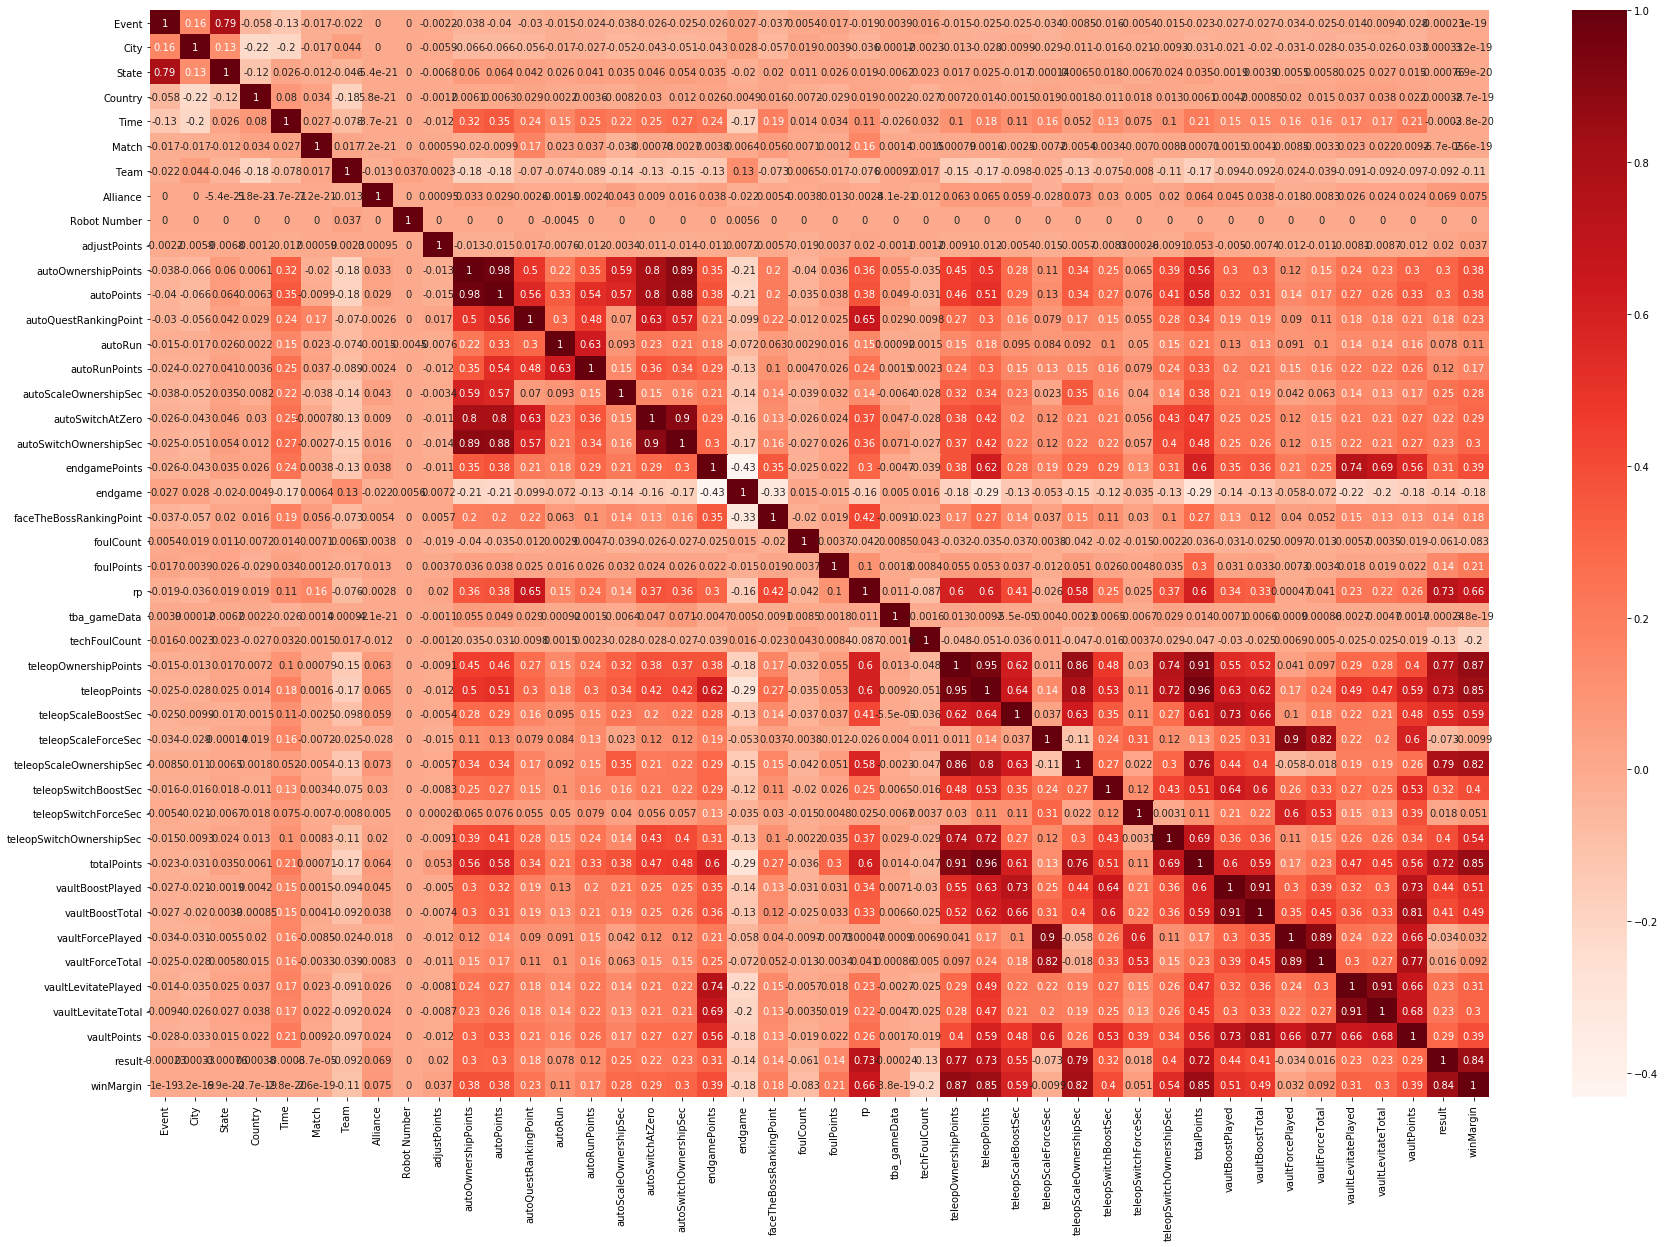

In [3]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
corr = data.corr()

# sns.heatmap(corr)

# Can be great to plot only a half matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(200, 40, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#Correlation with output variable
cor_target = abs(corr["result"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

rp                         0.725593
teleopOwnershipPoints      0.765045
teleopPoints               0.731516
teleopScaleBoostSec        0.551915
teleopScaleOwnershipSec    0.785779
totalPoints                0.720993
result                     1.000000
winMargin                  0.844848
Name: result, dtype: float64

## As we can see, the features 
#### [rp, teleopOwnershipPoints, teleopPoints, teleopScaleBoostSec, teleopScaleOwnershipSec, totalPoints, and winMargin] 
### are highly correlated with the output variable result. 

Hence we will drop all other features apart from these. However **this is not the end of the process**. One of the assumptions of **linear regression** is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [5]:
data[['rp', 'teleopOwnershipPoints', 'teleopPoints',
      'teleopScaleBoostSec', 'teleopScaleOwnershipSec',
      'teleopSwitchOwnershipSec', 'totalPoints', 'vaultBoostPlayed'
     ]].corr()

,rp,teleopOwnershipPoints,teleopPoints,teleopScaleBoostSec,teleopScaleOwnershipSec,teleopSwitchOwnershipSec,totalPoints,vaultBoostPlayed
rp,1.000000,0.602322,0.600320,0.413189,0.577093,0.369262,0.604074,0.340872
teleopOwnershipPoints,0.602322,1.000000,0.951957,0.624960,0.855541,0.744077,0.911703,0.551274
teleopPoints,0.600320,0.951957,1.000000,0.638168,0.795182,0.719183,0.959929,0.628393
teleopScaleBoostSec,0.413189,0.624960,0.638168,1.000000,0.626463,0.272372,0.608943,0.729174
teleopScaleOwnershipSec,0.577093,0.855541,0.795182,0.626463,1.000000,0.298835,0.757754,0.443966
teleopSwitchOwnershipSec,0.369262,0.744077,0.719183,0.272372,0.298835,1.000000,0.693910,0.355887
totalPoints,0.604074,0.911703,0.959929,0.608943,0.757754,0.693910,1.000000,0.602387
vaultBoostPlayed,0.340872,0.551274,0.628393,0.729174,0.443966,0.355887,0.602387,1.000000


### Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [6]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

### Now, the dataset has only those columns with correlation less than 0.9

In [7]:
result = data.result

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [9]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
prediction = svc.predict(x_test)

In [11]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9802126402835204


# 3. Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [12]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.077745
Best score using built-in LassoCV: 0.763411


In [13]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

TypeError: 'numpy.int64' object is not callable

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")